In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator

In [2]:
def read_all_scalars(log_path):
    ea = event_accumulator.EventAccumulator(log_path,
        size_guidance={
            event_accumulator.SCALARS: 0,
        })
    ea.Reload() # loads events from file
    tags = ea.Tags()["scalars"]
    metrics = {
        
    }
    for tag in tags:
        metrics[tag] = ea.Scalars(tag)

    return metrics

In [9]:
# Set the path to your tensorboard log

scalars = read_all_scalars("../outputs/basic/tf_logs/events.out.tfevents.1616083907.jupyter_fredralm.1491.0")
#scalars2 = read_all_scalars("../outputs/improved87/tf_logs/events.out.tfevents.1616167181.jupyter_fredralm.336.1")
#scalars3 = read_all_scalars("../outputs/improved87/tf_logs/events.out.tfevents.1616257740.jupyter_fredralm.329.0")

In [10]:
print("Possible scalars to plot:")
for tag in scalars.keys():
    print("\t", tag)

Possible scalars to plot:
	 losses/total_loss
	 losses/reg_loss
	 losses/cls_loss
	 lr
	 metrics/mnist_detection_val/mAP
	 metrics/mnist_detection_val/0
	 metrics/mnist_detection_val/1
	 metrics/mnist_detection_val/2
	 metrics/mnist_detection_val/3
	 metrics/mnist_detection_val/4
	 metrics/mnist_detection_val/5
	 metrics/mnist_detection_val/6
	 metrics/mnist_detection_val/7
	 metrics/mnist_detection_val/8
	 metrics/mnist_detection_val/9


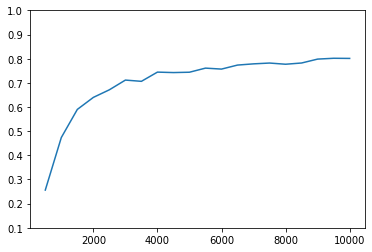

In [16]:
tag_to_plot = "metrics/mnist_detection_val/mAP"
values = scalars[tag_to_plot]# + scalars2[tag_to_plot] + scalars3[tag_to_plot]
iterations = [val.step for val in values]
values = [val.value for val in values]
plt.ylim([0.1, 1])
plt.plot(iterations, values)
plt.savefig('mAP_task4b')

In [9]:
%load_ext tensorboard

In [10]:
%load_ext tensorboard
%tensorboard --logdir output


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2021-03-18 16:36:13.547742: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Traceback (most recent call last):
  File "/opt/conda/bin/tensorboard", line 8, in <module>
    sys.exit(run_main())
  File "/home/fredralm/.local/lib/python3.8/site-packages/tensorboard/main.py", line 75, in run_main
    app.run(tensorboard.main, flags_parser=tensorboard.configure)
  File "/opt/conda/lib/python3.8/site-packages/absl/app.py", line 303, in run
    _run_main(main, args)
  File "/opt/conda/lib/python3.8/site-packages/absl/app.py", line 251, in _run_main
    sys.exit(main(argv))
  File "/home/fredralm/.local/lib/python3.8/site-packages/tensorboard/program.py", line 289, in main
    return runner(self.flags) or 0
  File "/home/fredralm/.local/lib/python3.8/site-packages/tensorboard/program.py", line 305, in _run_serve_subcommand
    server = self._make_server